In [1]:
import numpy as np
import cmath
import scipy
import random
from scipy.linalg import hadamard
from numpy.linalg import eig, qr, svd,inv
import matplotlib.pyplot as plt

In [2]:
#Pauli Matrices

s0 = [[1,0,0],[0,1,0],[0,0,1]];
s1 = [[0,1,0],[1,0,1],[0,1,0]]/np.sqrt(2);
s2 = [[0,-1j,0],[1j,0,-1j],[0,1j,0]]/np.sqrt(2);
s3 = [[1.0,0,0],[0,0,0],[0,0,-1.0]];

In [3]:
m = [s0 for i in range(2)];

In [4]:
# Will be useful for longer chains, to define hamiltonian
def func(n):
    if(n == 1):
        return(m[n-1])
 
    return np.kron(m[n-1],func(n-1))



In [5]:
#Getting four ground states

def get_four_lowest_eigenvectors(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    indices = np.argsort(eigenvalues)[0:4]  # Indices of the four lowest eigenvalues
    four_eigenvectors = eigenvectors[:, indices]
    return four_eigenvectors

In [6]:
#S+,S- operators
sp = s1+1j*s2
sm = s1 -1j*s2

In [7]:
# Perturbed hamiltonian definition

def hp(t):
    
    n=2;

 
  
    H = np.zeros((3**n,3**n));

    
        
    T = H;
    m[0] = s3;
    m[1] =s3;
        
    
    T = T + func(n);
        
#         if(i==0):
          
    
    m[0] = 0.5*np.exp(1j*t)*sp;
    m[1] =sm;
    
    T = T + func(n);
        
    m[0] = 0.5*np.exp(-1j*t)*sm;
    m[1] =sp;
       
    T = T + func(n);
         
        
        
        
    m[0] = s0;
    m[1] =s0;
        
        
        
        
    H = H + (T-H) + (0.99)*np.dot(T-H,T-H)/3;
        
    T = H;
    m[1] = s3;
    m[0] =s3;
        
    
    T = T + func(n);
          
    
    m[1] = 0.5*np.exp(0)*sp;
    m[0] =sm;
    
    T = T + func(n);
        
    m[1] = 0.5*np.exp(0)*sm;
    m[0] =sp;
       
    T = T + func(n);
        
    m[1] =s0;
    m[0] =s0;
        
    H = H + (T-H) + (0.99)*np.dot(T-H,T-H)/3;
#     H = H+ 0.00001*np.kron(s3,s3);
        
        
        

        
    return H

    
    
    

In [11]:
#Gate definitions obtained from experiments

I = 1j
i  = [[1, 0, 0], [0, 1, 0], [0, 0, 1]];
# x01_1 = [[0, 1, 0], [1, 0, 0], [0, 0, np.exp(1j*phi2_1)]] ;
# x01_2 = [[0, 1, 0], [1, 0, 0], [0, 0, np.exp(1j*phi2_2)]] ;

# x12_1 = [[np.exp(1j*phi0_1), 0, 0], [0, 0, 1], [0, 1, 0]] ;
# x12_2 = [[np.exp(1j*phi0_2), 0, 0], [0, 0, 1], [0, 1, 0]] ;

x01_1 = [[0, -1j, 0], [-1j, 0, 0], [0, 0, 1]] ;
x01_2 = [[0, -1j, 0], [-1j, 0, 0], [0, 0, 1]] ;

x12_1 = [[1, 0, 0], [0, 0, -1j], [0, -1j, 0]] ;
x12_2 = [[1, 0, 0], [0, 0, -1j], [0, -1j, 0]] ;

def u(t,p,l):
    return np.array([[np.cos(t/2),-np.exp(1j*l)*np.sin(t/2),0],[np.exp(1j*p)*np.sin(t/2),np.exp(1j*(p+l))*np.cos(t/2),0],[0,0,1]])

sx01_1 = [[1/np.sqrt(2), -1j/np.sqrt(2), 0], [-1j/np.sqrt(2),1/np.sqrt(2), 
    0], [0, 0, 1]] ;
sx12_1 = [[1, 0, 0], [0, 1/np.sqrt(2), -1j/np.sqrt(2)], [0, -1j/np.sqrt(2), 
    1/np.sqrt(2)]] ;

sx01_2 = [[1/np.sqrt(2), -1j/np.sqrt(2), 0], [-1j/np.sqrt(2),1/np.sqrt(2), 
    0], [0, 0, 1]] ;
sx12_2 = [[1, 0, 0], [0, 1/np.sqrt(2), -1j/np.sqrt(2)], [0, -1j/np.sqrt(2), 
    1/np.sqrt(2)]] ;

p0 = [[1, 0, 0], [0, 0, 0], [0, 0, 0]];
p1 = [[0, 0, 0], [0, 1, 0], [0, 0, 0]];
p2 = [[0, 0, 0], [0, 0, 0], [0, 0, 1]];
cxq01 = np.kron(p0, i) + np.kron(p1, [[0, 1, 0], [1, 0, 0], [0, 0, 1j]]) + np.kron(p2, [[1,0,0],[0,1,0],[0,0,np.exp(1j)]]);

In [12]:
#Gate definitions

def rz12(x):
    return [[1,0,0],[0,np.exp(0),0],[0,0,np.exp(I*x)]]

def rz01(x):
    return [[np.exp(0),0,0],[0,np.exp(I*x),0],[0,0,1]]

In [16]:
# Cost function such that the solution is the ground state of the perturbed hamiltonian

def G1(x):
    a = x[0]
    b =x[1]
    c =x[2]
    d =x[3]
    e=x[4]
    f=x[5]
    g =x[6]
    h = x[7]
    
    
    



    GS = np.kron(u(a,0,c),i)
    

    GS =GS@cxq01
    
    
    GS =GS@np.kron(x12_1,i)
    GS =GS@np.kron(i,x12_2)

    GS =GS@np.kron(sx01_1,i)
    GS =GS@np.kron(rz01(e),i)
    GS =GS@np.kron(sx01_1,i)
    GS =GS@np.kron(rz01(f),i)


    GS =GS@cxq01
   
    GS = GS@np.kron(x01_1,i)
    GS = GS@np.kron(x12_1,i)
    GS = GS@np.kron(x01_1,i)

    
    
    w = [1,0,0,0,0,0,0,0,0]
    
    w = w@GS
    
    
    return np.linalg.norm(hg@w - np.sort(eig(hg)[0])[0]*w)



In [17]:
def g1(x):
    
    a = x[0]
    b =x[1]
    c =x[2]
    d =x[3]
    e=x[4]
    f=x[5]
    g =x[6]
    h = x[7]
    
    
    


    GS = np.kron(u(a,0,c),i)
    

    GS =GS@cxq01
    
    
    GS =GS@np.kron(x12_1,i)
    GS =GS@np.kron(i,x12_2)

    GS =GS@np.kron(sx01_1,i)
    GS =GS@np.kron(rz01(e),i)
    GS =GS@np.kron(sx01_1,i)
    GS =GS@np.kron(rz01(f),i)

    GS =GS@cxq01
   
    GS = GS@np.kron(x01_1,i)
    GS = GS@np.kron(x12_1,i)
    GS = GS@np.kron(x01_1,i)

    
    
    w = [1,0,0,0,0,0,0,0,0]
    
    w = w@GS
    
    
    return w

In [36]:

#t runs from 0 to 2*pi with N divisons
m = [s0 for i in range(2)];
# B = np.eye(4)  # Berry phase from ED 
B_a = 0
B_a_l = []
B_e = 0
B_e_l = []
N = 40 #number of divisions
t = np.linspace(0,2*np.pi,N);#perturbation angles

t[-1] =0.0;#final perturbation = initial perturbation

hg = hp(0) #initial unperturbed hamiltonian 

G=np.random.random(9) # G for gauge fixing

#Calculating berry phase
for j in range(len(t)-1):
       
       #hamiltonian of the intermediate time step j
       hg = hp(t[j])
       
       #obtaining groundstates 
       l1 = get_four_lowest_eigenvectors(hg)[:,0]
       
       l2 = g1(minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS').x)
       print(G1(minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS').x))
       
       l2 = np.vdot(l2,G)*l2 
       l1 = np.vdot(l1,G)*l1 
       #hamiltonian for the t[j+1] th step 
    
        
       hg = hp(t[j+1])
        
       r2 = g1(minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS').x)
       r1 = get_four_lowest_eigenvectors(hg)[:,0]
       
        
       r2 = np.vdot(r2,G)*r2
       r1 = np.vdot(r1,G)*r1 
       
       
       r2 = r2
    
       B_a = B_a + cmath.phase(np.vdot(l2,r2)/np.linalg.norm(l2))
       B_e = B_e + cmath.phase(np.vdot(l1,r1)/np.linalg.norm(l1))
       B_a_l.append(B_a)
       B_e_l.append(B_e)
       
       print(B_a,B_e)
 
B_a = ((B_a/np.pi))%2
B_e = ((B_e/np.pi))%2
#Printing berry phase    
print(B_a,B_e)   

3.753334944223374e-07
-0.06385933730092842 -0.06386748308663666
5.136490453627009e-07
-0.1280449431271548 -0.12804588307627385
1.5446577985095619e-07
-0.19284953191174795 -0.19284686122910333
2.8512749872230644e-07
-0.25858471777814845 -0.2585832385978922
1.489489108478659e-07
-0.32557047699990527 -0.3255687286668071
2.2388388455213374e-07
-0.3941177324868313 -0.3941165866303239
1.301294961077542e-07
-0.46453766653532536 -0.4645367141956342
9.247879793950172e-08
-0.5371313907249808 -0.5371306997402168
1.9951316627029562e-08
-0.6121850625187589 -0.6121842429093245
7.246770871401977e-08
-0.6899571664211531 -0.6899564525287789
2.989030226355325e-08
-0.7706663682243331 -0.7706656761912822
2.2455013229835428e-08
-0.8544725751281973 -0.8544718893745039
2.3719249521806066e-08
-0.9414569843044869 -0.9414563032504752
1.5136538389879565e-08
-1.031600433580384 -1.0315997571608173
9.633101557539605e-09
-1.1247632254945819 -1.1247625525650167
1.2909896675065727e-08
-1.220670076534617 -1.22066940964

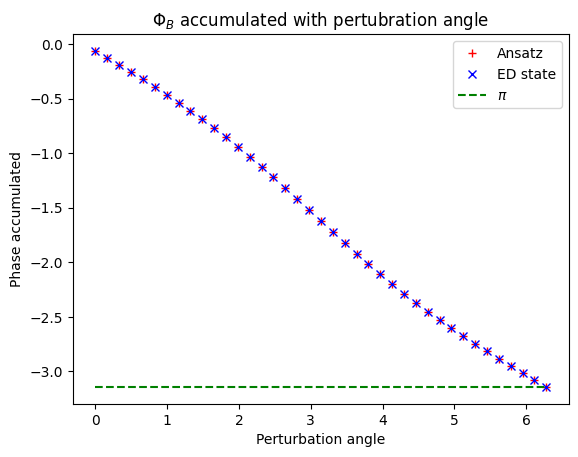

In [37]:
#Berry phase convergence plot n=40

plt.plot(np.linspace(0,2*np.pi,39),B_a_l,"+r",label="Ansatz")
plt.plot(np.linspace(0,2*np.pi,39),B_e_l,"xb",label="ED state")
plt.plot(np.linspace(0,2*np.pi,39),-np.ones(39)*np.pi,"--g",label ="$\pi$")

plt.xlabel("Perturbation angle")
plt.ylabel("Phase accumulated")
plt.title("$\Phi_B$ accumulated with pertubration angle")
plt.legend()
plt.savefig("BP_accumulation_n40.pdf")

In [37]:
# wave vectors from recent (Apr 4th) run on Hanoi

w = [np.array([0.01162158, -0.00465488,  0.33739193,  0.0072317,   0.31953348,  0.00605047,
  0.30543009,  0.02578479, -0.00838916])] #0 0
w.append(np.array([0.00067024, -0.00236954,  0.43210499, -0.00177051,  0.10078978,  0.01457336,
  0.39321297,  0.03774422,  0.02504449])) #2pi/3 1
w.append(np.array([2.12115478e-02, 3.46200781e-03, 3.47218970e-01, 1.57590447e-02,
 1.84381092e-01, 1.61194434e-04, 3.57202571e-01, 2.98836136e-02,
 4.07199590e-02])) #pi/2 2
w.append(np.array([0.03142523, 0.00194623, 0.35768344, 0.00328126, 0.21747801, 0.01430082,
 0.32693466, 0.02654251, 0.02040784])) #2pi/5 3
w.append(np.array([2.21261481e-02, -1.36740039e-04,  3.20134642e-01,  4.79971741e-03,
  2.67555581e-01,  4.67825507e-03 , 3.39997716e-01,  2.26352755e-02,
  1.82094055e-02])) # 2pi/6 4
w.append(np.array([0.01091598, -0.00241662 , 0.35073897,  0.01036843  ,0.29054482 ,-0.00758829,
  0.29930806 , 0.03246427 , 0.01566437])) # 2pi/7 5
w.append(np.array( [0.01443338, -0.00759534 , 0.39960547,  0.0082209  , 0.09052253 ,-0.00192335,
  0.39951553 , 0.03615589 , 0.06106499])) # 4pi/3 6
w.append(np.array([6.80718910e-03,  6.02283556e-03 , 4.43831627e-01, -3.66688786e-03,
  6.38676080e-02 , 2.86909548e-02 , 4.20161469e-01,  3.43499846e-02,
 -6.47802471e-05])) #4pi/5 7
w.append(np.array([0.02959617,  0.00259343 , 0.36817979,  0.00788336 , 0.18920559 , 0.00494269,
  0.39323909,  0.02657886 ,-0.022219] )) #4pi/7 8
w.append(np.array([0.00722698,  0.00380351,  0.39609568, -0.00232187,  0.19588625,  0.02059617,
  0.34785905 , 0.02012307,  0.01073116])) # 3pi/2 9
w.append(np.array( [0.01687536 , 0.00418956,  0.4172253,  -0.00176515,  0.04644531 , 0.02833333,
  0.40482875 , 0.03107608 , 0.05279148])) #6pi/5 10
w.append(np.array([0.02584046  ,0.00547339 , 0.41774764 ,-0.00507892 , 0.02374591 , 0.0311637,
  0.42527601 , 0.02961148,  0.04622033])) #6pi/7 11
w.append(np.array([0.005196  , 0.00157121, 0.37354749, 0.002142,   0.2548247 , 0.01558938,
 0.31573322 ,0.02752265 ,0.00387336])) #10pi/6 12
w.append(np.array([0.02349984 ,-0.0057321 ,  0.43988562 ,-0.00135873 , 0.04005334,  0.0423582,
  0.44576959,  0.03916698, -0.02364274])) #8pi/7 13
w.append(np.array([0.01175623,  0.00166792,  0.37777297 , 0.0122775 ,  0.16938342,  0.00785588,
  0.39387426 , 0.03347079 ,-0.00805898])) #10pi/7 14
w.append(np.array([0.01449329, -0.00143568 , 0.34005056,  0.00144727,  0.23476494,  0.01983087,
  0.33024341,  0.03142149,  0.02918384])) #12pi/7 15
w.append(np.array([-0.01654823,  0.01369785,  0.45452254,  0.0087674,  -0.00122485,  0.02452292,
  0.47829132,  0.02643333,  0.01153772])) #pi 16


In [221]:

#t runs from 0 to 2*pi with N divisons
m = [s0 for i in range(2)];
# B = np.eye(4)  # Berry phase from ED 
B_a = 0
B_a_l = []
B_e = 0
B_e_l = []
B_h = 0
B_h_l = []

N = 3 #number of divisions

v = []
v.append(np.sqrt(np.abs(w[0])))
v.append(np.sqrt(np.abs(w[16])))
v.append(np.sqrt(np.abs(w[0])))






t = np.linspace(0,2*np.pi,N);#perturbation angles

t[-1] =0.0;#final perturbation = initial perturbation

hg = hp(0) #initial unperturbed hamiltonian 

# G=np.random.random(9) # G for gauge fixing

#Calculating berry phase
for j in range(len(t)-1):
       
       #hamiltonian of the intermediate time step j
       hg = hp(t[j])
       
       #obtaining groundstates 
       l1 = get_four_lowest_eigenvectors(hg)[:,0]
       
       l2 = g1(minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS').x)
       # print(G1(minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS').x))

       l3 = np.array([v[j][s]*(l1[s]+1e-9)/np.abs(l1[s]+1e-9) for s in range(9)])
       
       l2 = np.vdot(l2,G)*l2 
       l1 = np.vdot(l1,G)*l1
       l3 = np.vdot(l3,G)*l3  

       l1 = l1/np.linalg.norm(l1)
       l2 = l2/np.linalg.norm(l2)
       l3 = l3/np.linalg.norm(l3)

       #hamiltonian for the t[j+1] th step 
    
        
       hg = hp(t[j+1])
        
       r2 = g1(minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS').x)
       r1 = get_four_lowest_eigenvectors(hg)[:,0]
       r3 = np.array([v[j+1][s]*(r1[s]+1e-6)/np.abs(r1[s]+1e-6) for s in range(9)])
       
        
       r2 = np.vdot(r2,G)*r2
       r1 = np.vdot(r1,G)*r1 
       r3 = np.vdot(r3,G)*r3  

       r1 = r1/np.linalg.norm(r1)
       r2 = r2/np.linalg.norm(r2)
       r3 = r3/np.linalg.norm(r3)
       
       
     
    
       B_a = B_a + cmath.phase(np.vdot(l2,r2))
       B_e = B_e + cmath.phase(np.vdot(l1,r1))
       B_h = B_h + cmath.phase(np.vdot(l3,r3))

       B_a_l.append(B_a)
       B_e_l.append(B_e)
       B_h_l.append(B_h)
       
       print(B_e,B_h,B_a)
 
B_a = ((B_a/np.pi))%2
B_e = ((B_e/np.pi))%2
B_h = ((B_h/np.pi))%2
#Printing berry phase    
print(B_e,B_h,B_a)   

-3.1301061855071626 -3.7447983395763126e-11 3.1415865398397504
0.0 3.740955211604743e-08 0.0
0.0 1.1907830276245643e-08 0.0


In [38]:

#t runs from 0 to 2*pi with N divisons
m = [s0 for i in range(2)];
# B = np.eye(4)  # Berry phase from ED 
B_a = 0
B_a_l = []
B_e = 0
B_e_l_1 = []
B_h = 0
B_h_l_1 = []

N = 4 #number of divisions

v = []
v.append(np.sqrt(np.abs(w[0])))
v.append(np.sqrt(np.abs(w[1])))
v.append(np.sqrt(np.abs(w[6])))
v.append(np.sqrt(np.abs(w[0])))


t = np.linspace(0,2*np.pi,N);#perturbation angles

t[-1] =0.0;#final perturbation = initial perturbation

hg = hp(0) #initial unperturbed hamiltonian 

G= np.array([0.96871297, 0.0108841 , 0.26681228, 0.0415801 , 0.28625494,
       0.27344997, 0.44429681, 0.29462146, 0.69569228])# G for gauge fixing

#Calculating berry phase
for j in range(len(t)-1):
       
       #hamiltonian of the intermediate time step j
       hg = hp(t[j])
       
       #obtaining groundstates 
       l1 = get_four_lowest_eigenvectors(hg)[:,0]
       
       l2 = g1(minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS').x)
       # print(G1(minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS').x))

       l3 = np.array([v[j][s]*(l1[s]+1e-9)/np.abs(l1[s]+1e-9) for s in range(9)])
       
       l2 = np.vdot(l2,G)*l2 
       l1 = np.vdot(l1,G)*l1
       l3 = np.vdot(l3,G)*l3  

       l1 = l1/np.linalg.norm(l1)
       l2 = l2/np.linalg.norm(l2)
       l3 = l3/np.linalg.norm(l3)

       #hamiltonian for the t[j+1] th step 
    
        
       hg = hp(t[j+1])
        
       r2 = g1(minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS').x)
       r1 = get_four_lowest_eigenvectors(hg)[:,0]
       r3 = np.array([v[j+1][s]*(r1[s]+1e-6)/np.abs(r1[s]+1e-6) for s in range(9)])
       
        
       r2 = np.vdot(r2,G)*r2
       r1 = np.vdot(r1,G)*r1 
       r3 = np.vdot(r3,G)*r3  

       r1 = r1/np.linalg.norm(r1)
       r2 = r2/np.linalg.norm(r2)
       r3 = r3/np.linalg.norm(r3)
       
       
     
    
       B_a = B_a + cmath.phase(np.vdot(l2,r2))
       B_e = B_e + cmath.phase(np.vdot(l1,r1))
       B_h = B_h + cmath.phase(np.vdot(l3,r3))

       B_a_l.append(B_a)
       B_e_l_1.append(B_e)
       B_h_l_1.append(B_h)
       
       print(B_e,B_h,B_a)
 
B_a = ((B_a/np.pi))%2
B_e = ((B_e/np.pi))%2
B_h = ((B_h/np.pi))%2
#Printing berry phase    
print(B_e,B_h,B_a)   

-0.6279736135652207 -0.8092094794790994 -0.6279518005781215
-2.5136190400245972 -2.0119432091123697 -2.5135972783501614
-3.141592653589818 -2.822145774814262 -3.1415473264508016
0.999999999999992 1.1016830996248066 1.0000144280764536


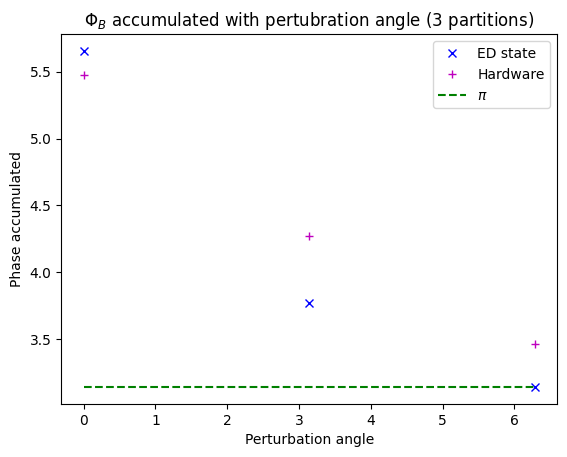

In [243]:
#Berry phase convergence plot n=4
#Berry phase convergence plot n=4

# plt.plot(np.linspace(0,2*np.pi,3),pos(B_a_l),"+r",label="Ansatz")
plt.plot(np.linspace(0,2*np.pi,3),pos(B_e_l_1),"xb",label="ED state")
plt.plot(np.linspace(0,2*np.pi,3),pos(B_h_l_1),"+m",label="Hardware")
plt.plot(np.linspace(0,2*np.pi,3),np.ones(3)*np.pi,"--g",label ="$\pi$")

plt.xlabel("Perturbation angle")
plt.ylabel("Phase accumulated")
plt.title("$\Phi_B$ accumulated with pertubration angle (3 partitions)")
plt.legend()
plt.savefig("BP_accumulation_n3_h_Apr_18th.pdf")

In [42]:

#t runs from 0 to 2*pi with N divisons
m = [s0 for i in range(2)];
# B = np.eye(4)  # Berry phase from ED 
B_a = 0
B_a_l = []
B_e = 0
B_e_l_2 = []
B_h = 0
B_h_l_2 = []

N = 5 #number of divisions

v = []
v.append(np.sqrt(np.abs(w[0])))
v.append(np.sqrt(np.abs(w[2])))
v.append(np.sqrt(np.abs(w[16])))
v.append(np.sqrt(np.abs(w[9])))
v.append(np.sqrt(np.abs(w[0])))






t = np.linspace(0,2*np.pi,N);#perturbation angles

t[-1] =0.0;#final perturbation = initial perturbation

hg = hp(0) #initial unperturbed hamiltonian 

G=np.array([0.76531311, 0.03244028, 0.87887426, 0.02030666, 0.09173055,
       0.6691869 , 0.09001024, 0.31564287, 0.0349597 ])# G for gauge fixing

#Calculating berry phase
for j in range(len(t)-1):
       
       #hamiltonian of the intermediate time step j
       hg = hp(t[j])
       
       #obtaining groundstates 
       l1 = get_four_lowest_eigenvectors(hg)[:,0]
       
       l2 = g1(minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS').x)
       # print(G1(minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS').x))

       l3 = np.array([v[j][s]*(l1[s]+1e-9)/np.abs(l1[s]+1e-9) for s in range(9)])
       
       l2 = np.vdot(l2,G)*l2 
       l1 = np.vdot(l1,G)*l1
       l3 = np.vdot(l3,G)*l3  

       l1 = l1/np.linalg.norm(l1)
       l2 = l2/np.linalg.norm(l2)
       l3 = l3/np.linalg.norm(l3)

       #hamiltonian for the t[j+1] th step 
    
        
       hg = hp(t[j+1])
        
       r2 = g1(minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS').x)
       r1 = get_four_lowest_eigenvectors(hg)[:,0]
       r3 = np.array([v[j+1][s]*(r1[s]+1e-6)/np.abs(r1[s]+1e-6) for s in range(9)])
       
        
       r2 = np.vdot(r2,G)*r2
       r1 = np.vdot(r1,G)*r1 
       r3 = np.vdot(r3,G)*r3  

       r1 = r1/np.linalg.norm(r1)
       r2 = r2/np.linalg.norm(r2)
       r3 = r3/np.linalg.norm(r3)
       
       
     
    
       B_a = B_a + cmath.phase(np.vdot(l2,r2))
       B_e = B_e + cmath.phase(np.vdot(l1,r1))
       B_h = B_h + cmath.phase(np.vdot(l3,r3))

       B_a_l.append(B_a)
       B_e_l_2.append(B_e)
       B_h_l_2.append(B_h)
       
       print(B_e,B_h,B_a)
 
B_a = ((B_a/np.pi))%2
B_e = ((B_e/np.pi))%2
B_h = ((B_h/np.pi))%2
#Printing berry phase    
print(B_e,B_h,B_a)   

0.7326087157517774 0.6652958017901541 0.7326233800770737
1.570796326794889 1.6049109645873219 3.1416073282736843
2.4089839378380002 2.4778060015696473 5.550591290479047
3.1415926535897776 3.1395207987157616 6.2832115378108195
0.999999999999995 0.9993405081108577 8.349469242219243e-06


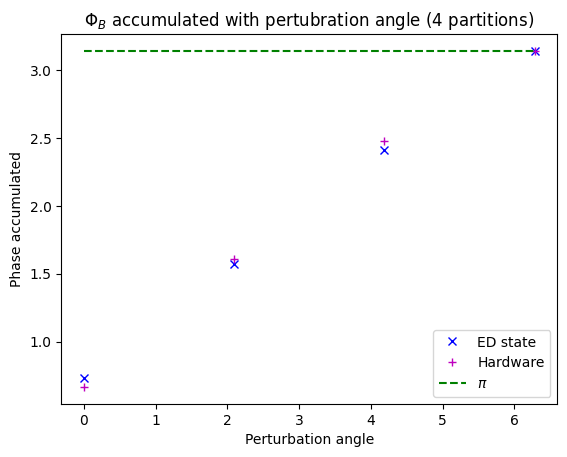

In [248]:
#Berry phase convergence plot n=4
#Berry phase convergence plot n=4

# plt.plot(np.linspace(0,2*np.pi,4),B_a_l,"+r",label="Ansatz")
plt.plot(np.linspace(0,2*np.pi,4),pos(B_e_l_2),"xb",label="ED state")
plt.plot(np.linspace(0,2*np.pi,4),pos(B_h_l_2),"+m",label="Hardware")
plt.plot(np.linspace(0,2*np.pi,4),np.ones(4)*np.pi,"--g",label ="$\pi$")

plt.xlabel("Perturbation angle")
plt.ylabel("Phase accumulated")
plt.title("$\Phi_B$ accumulated with pertubration angle (4 partitions)")
plt.legend()
plt.savefig("BP_accumulation_n4_h_Apr_18th.pdf")

In [43]:

#t runs from 0 to 2*pi with N divisons
m = [s0 for i in range(2)];
# B = np.eye(4)  # Berry phase from ED 
B_a = 0
B_a_l = []
B_e = 0
B_e_l_3 = []
B_h = 0
B_h_l_3 = []

N = 6 #number of divisions

v = []
v.append(np.sqrt(np.abs(w[0])))
v.append(np.sqrt(np.abs(w[3])))
v.append(np.sqrt(np.abs(w[7])))
v.append(np.sqrt(np.abs(w[10])))
v.append(np.sqrt(np.abs(w[3])))
v.append(np.sqrt(np.abs(w[0])))






t = np.linspace(0,2*np.pi,N);#perturbation angles

t[-1] =0.0;#final perturbation = initial perturbation

hg = hp(0) #initial unperturbed hamiltonian 

G=np.array([0.96396536, 0.82976974, 0.91346208, 0.29728973, 0.73918601,
       0.77357891, 0.65754086, 0.94238862, 0.58922024]) # G for gauge fixing

#Calculating berry phase
for j in range(len(t)-1):
       
       #hamiltonian of the intermediate time step j
       hg = hp(t[j])
       
       #obtaining groundstates 
       l1 = get_four_lowest_eigenvectors(hg)[:,0]
       
       l2 = g1(minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS').x)
       # print(G1(minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS').x))

       l3 = np.array([v[j][s]*(l1[s]+1e-9)/np.abs(l1[s]+1e-9) for s in range(9)])
       
       l2 = np.vdot(l2,G)*l2 
       l1 = np.vdot(l1,G)*l1
       l3 = np.vdot(l3,G)*l3  

       l1 = l1/np.linalg.norm(l1)
       l2 = l2/np.linalg.norm(l2)
       l3 = l3/np.linalg.norm(l3)

       #hamiltonian for the t[j+1] th step 
    
        
       hg = hp(t[j+1])
        
       r2 = g1(minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS').x)
       r1 = get_four_lowest_eigenvectors(hg)[:,0]
       r3 = np.array([v[j+1][s]*(r1[s]+1e-6)/np.abs(r1[s]+1e-6) for s in range(9)])
       
        
       r2 = np.vdot(r2,G)*r2
       r1 = np.vdot(r1,G)*r1 
       r3 = np.vdot(r3,G)*r3  

       r1 = r1/np.linalg.norm(r1)
       r2 = r2/np.linalg.norm(r2)
       r3 = r3/np.linalg.norm(r3)
       
       
     
    
       B_a = B_a + cmath.phase(np.vdot(l2,r2))
       B_e = B_e + cmath.phase(np.vdot(l1,r1))
       B_h = B_h + cmath.phase(np.vdot(l3,r3))

       B_a_l.append(B_a)
       B_e_l_3.append(B_e)
       B_h_l_3.append(B_h)
       
       print(B_e,B_h,B_a)
 
B_a = ((B_a/np.pi))%2
B_e = ((B_e/np.pi))%2
B_h = ((B_h/np.pi))%2
#Printing berry phase    
print(B_e,B_h,B_a)   

0.22028533583264936 -0.22962766311769936 0.2202952315952035
0.7610136328419728 1.060616666352156 0.7610235827391925
2.3805790207478092 1.8258551040045474 2.3805889451124775
2.9213073177571327 2.4064902870951146 2.921317247404915
3.141592653589782 2.798321307349553 3.1416116770738927
0.9999999999999964 0.8907333368481125 1.0000060553630585


In [44]:
def pos(a):
    b = a
    for u in range(len(a)):
        if(a[u]<= 0.0005):
            b[u]=b[u]+2*np.pi
            
    return b

In [279]:
G

array([0.96396536, 0.82976974, 0.91346208, 0.29728973, 0.73918601,
       0.77357891, 0.65754086, 0.94238862, 0.58922024])

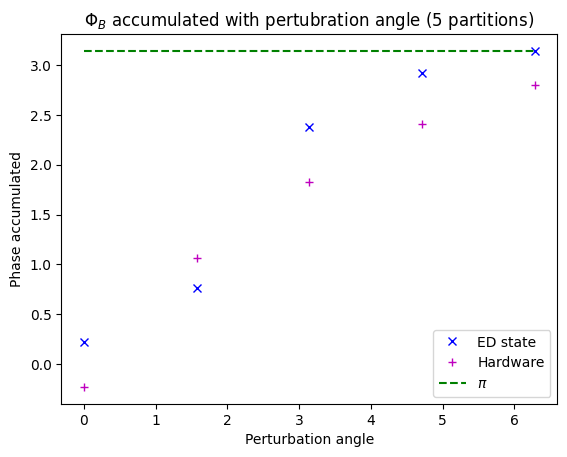

In [280]:
#Berry phase convergence plot n=4
#Berry phase convergence plot n=4

# plt.plot(np.linspace(0,2*np.pi,5),pos(B_a_l),"+r",label="Ansatz")
plt.plot(np.linspace(0,2*np.pi,5),B_e_l_3,"xb",label="ED state")
plt.plot(np.linspace(0,2*np.pi,5),B_h_l_3,"+m",label="Hardware")
plt.plot(np.linspace(0,2*np.pi,5),np.ones(5)*np.pi,"--g",label ="$\pi$")

plt.xlabel("Perturbation angle")
plt.ylabel("Phase accumulated")
plt.title("$\Phi_B$ accumulated with pertubration angle (5 partitions)")
plt.legend()
plt.savefig("BP_accumulation_n5_h_Apr_18th.pdf")

In [45]:

#t runs from 0 to 2*pi with N divisons
m = [s0 for i in range(2)];
# B = np.eye(4)  # Berry phase from ED 
B_a = 0
B_a_l = []
B_e = 0
B_e_l_4 = []
B_h = 0
B_h_l_4 = []

N = 7 #number of divisions

v = []
v.append(np.sqrt(np.abs(w[0])))
v.append(np.sqrt(np.abs(w[4])))
v.append(np.sqrt(np.abs(w[1])))
v.append(np.sqrt(np.abs(w[16])))
v.append(np.sqrt(np.abs(w[6])))
v.append(np.sqrt(np.abs(w[12])))
v.append(np.sqrt(np.abs(w[0])))






t = np.linspace(0,2*np.pi,N);#perturbation angles

t[-1] =0.0;#final perturbation = initial perturbation

hg = hp(0) #initial unperturbed hamiltonian 

G=np.array([0.94726087, 0.47281778, 0.70799839, 0.58992824, 0.59237972,
       0.89799428, 0.82074675, 0.08780326, 0.28671693]) # G for gauge fixing

#Calculating berry phase
for j in range(len(t)-1):
       
       #hamiltonian of the intermediate time step j
       hg = hp(t[j])
       
       #obtaining groundstates 
       l1 = get_four_lowest_eigenvectors(hg)[:,0]
       
       l2 = g1(minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS').x)
       # print(G1(minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS').x))

       l3 = np.array([v[j][s]*(l1[s]+1e-9)/np.abs(l1[s]+1e-9) for s in range(9)])
       
       l2 = np.vdot(l2,G)*l2 
       l1 = np.vdot(l1,G)*l1
       l3 = np.vdot(l3,G)*l3  

       l1 = l1/np.linalg.norm(l1)
       l2 = l2/np.linalg.norm(l2)
       l3 = l3/np.linalg.norm(l3)

       #hamiltonian for the t[j+1] th step 
    
        
       hg = hp(t[j+1])
        
       r2 = g1(minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS').x)
       r1 = get_four_lowest_eigenvectors(hg)[:,0]
       r3 = np.array([v[j+1][s]*(r1[s]+1e-6)/np.abs(r1[s]+1e-6) for s in range(9)])
       
        
       r2 = np.vdot(r2,G)*r2
       r1 = np.vdot(r1,G)*r1 
       r3 = np.vdot(r3,G)*r3  

       r1 = r1/np.linalg.norm(r1)
       r2 = r2/np.linalg.norm(r2)
       r3 = r3/np.linalg.norm(r3)
       
       
     
    
       B_a = B_a + cmath.phase(np.vdot(l2,r2))
       B_e = B_e + cmath.phase(np.vdot(l1,r1))
       B_h = B_h + cmath.phase(np.vdot(l3,r3))

       B_a_l.append(B_a)
       B_e_l_4.append(B_e)
       B_h_l_4.append(B_h)
       
       print(B_e,B_h,B_a)
 
B_a = ((B_a/np.pi))%2
B_e = ((B_e/np.pi))%2
B_h = ((B_h/np.pi))%2
#Printing berry phase    
print(B_e,B_h,B_a)   

-0.06946694359443556 -0.22683770428160044 -0.06945976034332288
-0.20624384971959422 -0.4722583272967541 -0.20623659205171496
-1.5707963267948977 -1.4747455187086658 -3.141585374885905
-2.9353488038702023 -2.352201262949503 -6.076934222769067
-3.0721257099953645 -2.767954618059266 -6.213710764407543
-3.1415926535897984 -2.9639898269985157 -6.283169912567005
0.9999999999999982 1.056532735518189 4.900257378537276e-06


In [46]:
G

array([0.94726087, 0.47281778, 0.70799839, 0.58992824, 0.59237972,
       0.89799428, 0.82074675, 0.08780326, 0.28671693])

In [291]:
# B_h_l[1] = B_h_l[1] + 2*np.pi
# B_h_l[2] = B_h_l[2] + 2*np.pi
# B_h_l[3] = B_h_l[3] + 2*np.pi
# B_h_l[4] = B_h_l[4] + 2*np.pi
# B_h_l[5] = B_h_l[5] + 2*np.pi


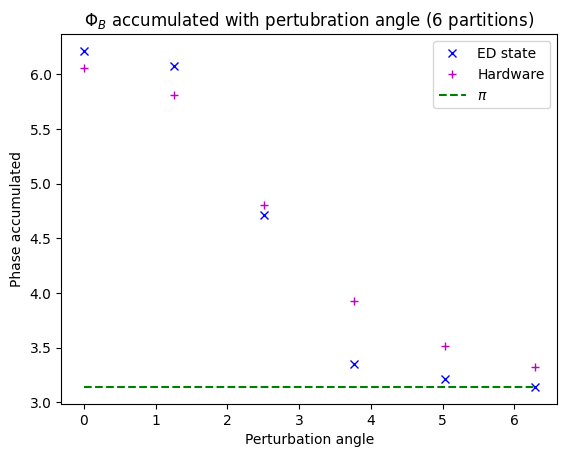

In [293]:
#Berry phase convergence plot n=4
#Berry phase convergence plot n=4

# plt.plot(np.linspace(0,2*np.pi,6),B_a_l,"+r",label="Ansatz")
plt.plot(np.linspace(0,2*np.pi,6),pos(B_e_l_4),"xb",label="ED state")
plt.plot(np.linspace(0,2*np.pi,6),pos(B_h_l_4),"+m",label="Hardware")
plt.plot(np.linspace(0,2*np.pi,6),np.ones(6)*np.pi,"--g",label ="$\pi$")

plt.xlabel("Perturbation angle")
plt.ylabel("Phase accumulated")
plt.title("$\Phi_B$ accumulated with pertubration angle (6 partitions)")
plt.legend()
plt.savefig("BP_accumulation_n6_h_Apr_4th.pdf")

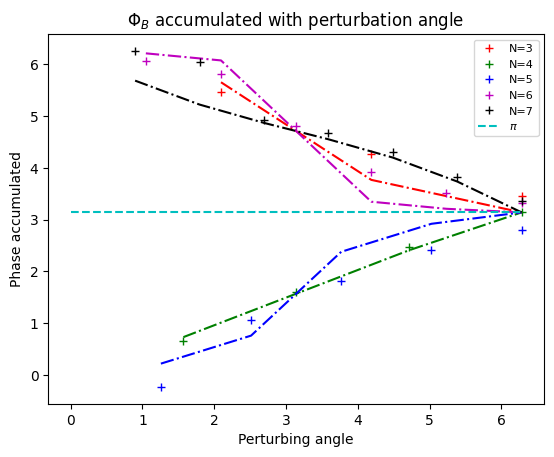

In [51]:
x3 = [2*np.pi/3,4*np.pi/3,6*np.pi/3]
x4 = [2*np.pi/4,4*np.pi/4,6*np.pi/4,8*np.pi/4]
x5 = [2*np.pi/5,4*np.pi/5,6*np.pi/5,8*np.pi/5,10*np.pi/5]
x6 = [2*np.pi/6,4*np.pi/6,6*np.pi/6,8*np.pi/6,10*np.pi/6,12*np.pi/6]
x7 = [2*np.pi/7,4*np.pi/7,6*np.pi/7,8*np.pi/7,10*np.pi/7,12*np.pi/7,14*np.pi/7]

plt.plot(x3,pos(B_e_l_1),"-.r")
plt.plot(x3,pos(B_h_l_1),"+r",label="N=3")

plt.plot(x4,pos(B_e_l_2),"-.g")
plt.plot(x4,pos(B_h_l_2),"+g",label="N=4")

plt.plot(x5,(B_e_l_3),"-.b")
plt.plot(x5,(B_h_l_3),"+b",label="N=5")

plt.plot(x6,pos(B_e_l_4),"-.m")
plt.plot(x6,pos(B_h_l_4),"+m",label="N=6")

plt.plot(x7,pos(B_e_l_5),"-.k")
plt.plot(x7,pos(B_h_l_5),"+k",label="N=7")

plt.plot(np.linspace(0,2*np.pi,20),np.ones(20)*np.pi,"--c",label ="$\pi$")

plt.xlabel("Perturbing angle")
plt.ylabel("Phase accumulated")
plt.title("$\Phi_B$ accumulated with perturbation angle")
plt.legend(fontsize=8)
plt.savefig("BP_H_Apr_4th.pdf")

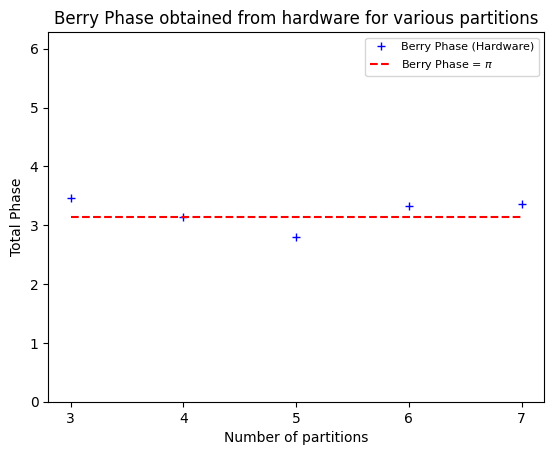

In [58]:
B = [B_h_l_1[-1],B_h_l_2[-1],B_h_l_3[-1],B_h_l_4[-1],B_h_l_5[-1]]
N = [3,4,5,6,7]

plt.plot(N,B,"+b",label = "Berry Phase (Hardware)")
plt.xticks(N)
plt.plot(N,np.pi*np.ones(5),"--r",label = "Berry Phase = $\pi$")

plt.xlabel("Number of partitions")
plt.ylim([0,2*np.pi])
plt.ylabel("Total Phase")
plt.title("Berry Phase obtained from hardware for various partitions")
plt.legend(fontsize=8)
plt.savefig("BP_vs_N.pdf")

In [120]:
# wave vectors from recent (Apr 4th) run on Hanoi

w = [np.array([0.01162158, -0.00465488,  0.33739193,  0.0072317,   0.31953348,  0.00605047,
  0.30543009,  0.02578479, -0.00838916])] #0 0
w.append(np.array([0.00067024, -0.00236954,  0.43210499, -0.00177051,  0.10078978,  0.01457336,
  0.39321297,  0.03774422,  0.02504449])) #2pi/3 1
w.append(np.array([2.12115478e-02, 3.46200781e-03, 3.47218970e-01, 1.57590447e-02,
 1.84381092e-01, 1.61194434e-04, 3.57202571e-01, 2.98836136e-02,
 4.07199590e-02])) #pi/2 2
w.append(np.array([0.03142523, 0.00194623, 0.35768344, 0.00328126, 0.21747801, 0.01430082,
 0.32693466, 0.02654251, 0.02040784])) #2pi/5 3
w.append(np.array([2.21261481e-02, -1.36740039e-04,  3.20134642e-01,  4.79971741e-03,
  2.67555581e-01,  4.67825507e-03 , 3.39997716e-01,  2.26352755e-02,
  1.82094055e-02])) # 2pi/6 4
w.append(np.array([0.01091598, -0.00241662 , 0.35073897,  0.01036843  ,0.29054482 ,-0.00758829,
  0.29930806 , 0.03246427 , 0.01566437])) # 2pi/7 5
w.append(np.array( [0.01443338, -0.00759534 , 0.39960547,  0.0082209  , 0.09052253 ,-0.00192335,
  0.39951553 , 0.03615589 , 0.06106499])) # 4pi/3 6
w.append(np.array([6.80718910e-03,  6.02283556e-03 , 4.43831627e-01, -3.66688786e-03,
  6.38676080e-02 , 2.86909548e-02 , 4.20161469e-01,  3.43499846e-02,
 -6.47802471e-05])) #4pi/5 7
w.append(np.array([0.02959617,  0.00259343 , 0.36817979,  0.00788336 , 0.18920559 , 0.00494269,
  0.39323909,  0.02657886 ,-0.022219] )) #4pi/7 8
w.append(np.array([0.00722698,  0.00380351,  0.39609568, -0.00232187,  0.19588625,  0.02059617,
  0.34785905 , 0.02012307,  0.01073116])) # 3pi/2 9
w.append(np.array( [0.01687536 , 0.00418956,  0.4172253,  -0.00176515,  0.04644531 , 0.02833333,
  0.40482875 , 0.03107608 , 0.05279148])) #6pi/5 10
w.append(np.array([0.02584046  ,0.00547339 , 0.41774764 ,-0.00507892 , 0.02374591 , 0.0311637,
  0.42527601 , 0.02961148,  0.04622033])) #6pi/7 11
w.append(np.array([0.005196  , 0.00157121, 0.37354749, 0.002142,   0.2548247 , 0.01558938,
 0.31573322 ,0.02752265 ,0.00387336])) #10pi/6 12
w.append(np.array([0.02349984 ,-0.0057321 ,  0.43988562 ,-0.00135873 , 0.04005334,  0.0423582,
  0.44576959,  0.03916698, -0.02364274])) #8pi/7 13
w.append(np.array([0.01175623,  0.00166792,  0.37777297 , 0.0122775 ,  0.16938342,  0.00785588,
  0.39387426 , 0.03347079 ,-0.00805898])) #10pi/7 14
w.append(np.array([0.01449329, -0.00143568 , 0.34005056,  0.00144727,  0.23476494,  0.01983087,
  0.33024341,  0.03142149,  0.02918384])) #12pi/7 15
w.append(np.array([-0.01654823,  0.01369785,  0.45452254,  0.0087674,  -0.00122485,  0.02452292,
  0.47829132,  0.02643333,  0.01153772])) #pi 16


In [47]:

#t runs from 0 to 2*pi with N divisons
m = [s0 for i in range(2)];
# B = np.eye(4)  # Berry phase from ED 
B_a = 0
B_a_l = []
B_e = 0
B_e_l_5 = []
B_h = 0
B_h_l_5 = []

N = 8 #number of divisions

v = []
v.append(np.sqrt(np.abs(w[0])))
v.append(np.sqrt(np.abs(w[5])))
v.append(np.sqrt(np.abs(w[8])))
v.append(np.sqrt(np.abs(w[11])))
v.append(np.sqrt(np.abs(w[13])))
v.append(np.sqrt(np.abs(w[14])))
v.append(np.sqrt(np.abs(w[15])))
v.append(np.sqrt(np.abs(w[0])))






t = np.linspace(0,2*np.pi,N);#perturbation angles

t[-1] =0.0;#final perturbation = initial perturbation

hg = hp(0) #initial unperturbed hamiltonian 

G=np.array([0.20013499, 0.29427194, 0.30733263, 0.61865688, 0.75753274,
       0.76259686, 0.8009442 , 0.58914044, 0.09411063]) # G for gauge fixing

#Calculating berry phase
for j in range(len(t)-1):
       
       #hamiltonian of the intermediate time step j
       hg = hp(t[j])
       
       #obtaining groundstates 
       l1 = get_four_lowest_eigenvectors(hg)[:,0]
       
       l2 = g1(minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS').x)
       # print(G1(minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS').x))

       l3 = np.array([v[j][s]*(l1[s]+1e-9)/np.abs(l1[s]+1e-9) for s in range(9)])
       
       l2 = np.vdot(l2,G)*l2 
       l1 = np.vdot(l1,G)*l1
       l3 = np.vdot(l3,G)*l3  

       l1 = l1/np.linalg.norm(l1)
       l2 = l2/np.linalg.norm(l2)
       l3 = l3/np.linalg.norm(l3)

       #hamiltonian for the t[j+1] th step 
    
        
       hg = hp(t[j+1])
        
       r2 = g1(minimize(G1,[0,0,0,0,0,0,0,0],  method='BFGS').x)
       r1 = get_four_lowest_eigenvectors(hg)[:,0]
       r3 = np.array([v[j+1][s]*(r1[s]+1e-6)/np.abs(r1[s]+1e-6) for s in range(9)])
       
        
       r2 = np.vdot(r2,G)*r2
       r1 = np.vdot(r1,G)*r1 
       r3 = np.vdot(r3,G)*r3  

       r1 = r1/np.linalg.norm(r1)
       r2 = r2/np.linalg.norm(r2)
       r3 = r3/np.linalg.norm(r3)
       
       
     
    
       B_a = B_a + cmath.phase(np.vdot(l2,r2))
       B_e = B_e + cmath.phase(np.vdot(l1,r1))
       B_h = B_h + cmath.phase(np.vdot(l3,r3))

       B_a_l.append(B_a)
       B_e_l_5.append(B_e)
       B_h_l_5.append(B_h)
       
       print(B_e,B_h,B_a)
 
B_a = ((B_a/np.pi))%2
B_e = ((B_e/np.pi))%2
B_h = ((B_h/np.pi))%2
#Printing berry phase    
print(B_e,B_h,B_a)   

-0.5966292905182321 -0.022695090403198784 -0.5966261385900888
-1.058810328178271 -0.23597596137071464 -1.0588066965529466
-1.4123933841629046 -1.3554891209117708 -1.4123896829399307
-1.7291992694268945 -1.60507448386714 -1.7291955614602434
-2.082782325411529 -1.9840677893615493 -2.0827785984459046
-2.544963363071565 -2.465725990535995 -2.54496039248389
-3.141592653589799 -2.9261986652024006 -3.141579579511908
0.9999999999999982 1.0685620359282635 1.0000041616082436


In [302]:
G

array([0.20013499, 0.29427194, 0.30733263, 0.61865688, 0.75753274,
       0.76259686, 0.8009442 , 0.58914044, 0.09411063])

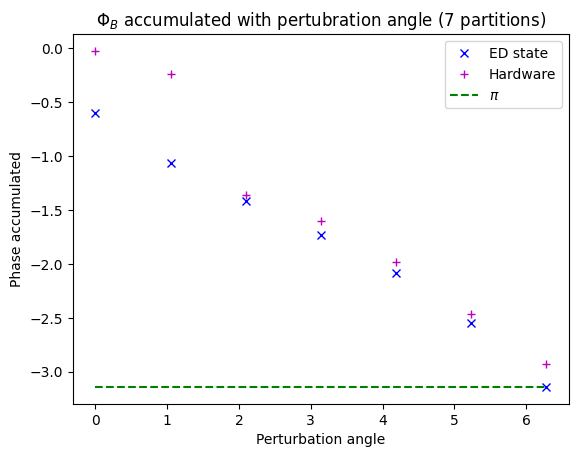

In [304]:
#Berry phase convergence plot n=4
#Berry phase convergence plot n=4

# plt.plot(np.linspace(0,2*np.pi,6),B_a_l,"+r",label="Ansatz")
plt.plot(np.linspace(0,2*np.pi,7),B_e_l_5,"xb",label="ED state")
plt.plot(np.linspace(0,2*np.pi,7),B_h_l_5,"+m",label="Hardware")
plt.plot(np.linspace(0,2*np.pi,7),-np.ones(7)*np.pi,"--g",label ="$\pi$")

plt.xlabel("Perturbation angle")
plt.ylabel("Phase accumulated")
plt.title("$\Phi_B$ accumulated with pertubration angle (7 partitions)")
plt.legend()
plt.savefig("BP_accumulation_n7_h_Apr_4th.pdf")